In [89]:
from glob import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as path_effects
import json

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


log_files = glob('../app/log/*.log')
len(log_files)

76

In [90]:
ref = pd.read_csv("golden_answers.csv",skiprows=1)
ref

,Index,Golden Answer - SM,Golden Question,Unnamed: 3,Unnamed: 4,Mistral,Mistral.1,Mistral.2,Llama,Llama.1,Llama.2
0,1,It sounds like a fantastic trip you have plann...,What are your favorite luxury camp meals for a...,NaN,That sounds like an exciting adventure you're ...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,It sounds like a fantastic trip you have plann...,I'm taking a solo trip with my dog around Than...,,That sounds like an amazing adventure you've g...,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Embarking on a cross-Canada road trip with you...,I'm planning a 3-4 week family road trip from ...,,That sounds like an amazing adventure you're p...,NaN,NaN,NaN,NaN,NaN,NaN
3,4,If you're choosing between Seoul and Tokyo for...,What are the main differences between visiting...,,"Well, both Seoul and Tokyo are amazing cities ...",NaN,NaN,NaN,NaN,NaN,NaN
4,5,Planning a short solo trip for your birthday i...,Seeking destination and activity suggestions f...,,Hello! That sounds like an exciting adventure ...,NaN,NaN,NaN,NaN,NaN,NaN
5,6,"For a focused ""monk mode"" retreat, you'll want...","Where's the best place to go ""monk mode"" for t...",,That sounds like an exciting endeavor you're p...,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Guangzhou is a vibrant city with a rich blend ...,I'm a 28-year-old male heading to Guangzhou fo...,,Hello there! It sounds like you have an exciti...,NaN,NaN,NaN,NaN,NaN,NaN
7,8,"Ho Chi Minh City, commonly referred to as Saig...",Is Ho Chi Minh safe for a girl's solo trip?,NaN,"Absolutely, Ho Chi Minh is generally considere...",NaN,NaN,NaN,NaN,NaN,NaN
8,9,Costco Travel packages offer a convenient way ...,I'm considering booking a trip through Costco...,,"I haven't personally used Costco Travel, but I...",NaN,NaN,NaN,NaN,NaN,NaN
9,10,If you're heading to Europe for a few months a...,I'm planning a two-month trip to Europe in Ma...,,That sounds like an amazing adventure! There a...,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:

ref_QA = pd.Series(ref['Golden Answer - SM'].values,index=ref['Golden Question']).to_dict()
ref_QMPC = pd.Series(ref['Unnamed: 4'].values,index=ref['Golden Question']).to_dict()

ref_QA = {k.replace('\n',''):v for k,v in ref_QA.items()}
ref_QMPC = {k.replace('\n',''):v for k,v in ref_QMPC.items()}

len(ref_QA)
ref_QA

{"What are your favorite luxury camp meals for a beginner-friendly 10-mile, 3-day backpacking trip, considering I'm willing to carry 10lbs of food and have basic cookware?": "It sounds like a fantastic trip you have planned, and I'm all in for making the dining experience as memorable as the journey! Based on the shared insights and considering you're okay with carrying about 10 pounds of food, I'd suggest kicking things off with fajitas. Marinate flanks or skirt steak in a flavorful blend, and with just a pan, you can cook the meat and toast tortillas over the fire. Throw in some freshly diced onions and jalapenos for that fresh crunch and a kick of spice. Breakfast could be a lavish affair too; imagine starting the day with some fluffy pancakes or a spread of eggs and bacon, paired with fruit to keep things balanced. Tip: store your fruit in running water nearby to stave off the summer heat; this works well with beer too!\n \nAs your trip continues, ribeyes can be seasoned to your li

In [92]:
cwd = os.getcwd()
chats_dir = os.path.join(os.path.dirname(cwd), 'app/log')
chats_log = os.listdir(chats_dir)

In [93]:

def read_log_file(log_file):
    """read each file and return contents"""
    log_filepath = os.path.join(chats_dir, log_file)

    if not os.path.exists(log_filepath):
        return f"Log file '{log_file}' not found."

    with open(log_filepath, 'r') as file:
        content = file.read()
        return content

In [94]:
#initialize a dictionary to store parsed results
history = {'name':[],'model':[],'rag':[],'reranker':[],'saved_chat_history':[],'question':[],'context':[],'response':[],'user_rating':[]}

#loop through each file and grab contents by keywords
for c in chats_log:
    print(c)
    content = read_log_file(c).split('\n')
    content = [item for item in content if item != ""]
    
    
    model_index = content.index('Model:')
    rag_index = content.index('RAG:')
    reranker_index = content.index('Reranker:')
    saved_chat_history_index = content.index('Saved_chat_history:')
    question_index = content.index('Question:')
    context_index = content.index('Context:')
    answer_index = content.index('Answer:')
    user_rating_index = content.index('User Rating:')
    
    model_list = ''.join(content[model_index:rag_index]).replace('Model:','')
    rag_list = ''.join(content[rag_index:reranker_index]).replace('RAG:','')
    reranker_list = ''.join(content[reranker_index:saved_chat_history_index]).replace('Reranker:','')
    saved_chat_history_list = ''.join(content[saved_chat_history_index:question_index]).replace('Saved_chat_history:','')
    question_list = ''.join(content[question_index:context_index]).replace('Question:','')
    context_list  = ''.join(content[context_index:answer_index]).replace('Context:','')
    answer_list = ''.join(content[answer_index:user_rating_index]).replace('Answer:','')
    user_rating_list = ''.join(content[user_rating_index:]).replace('User Rating:','')
    
    history['name'].append(c)
    history['model'].append(model_list)
    history['rag'].append(rag_list)
    history['reranker'].append(reranker_list)
    history['saved_chat_history'].append(saved_chat_history_list)
    history['question'].append(question_list)
    history['context'].append(context_list)
    history['response'].append(answer_list)
    history['user_rating'].append(user_rating_list)


2024-04-03_19-50-27.log
2024-04-04_13-25-18.log
2024-04-04_12-12-06.log
2024-04-04_12-59-11.log
2024-04-04_12-23-30.log
2024-04-03_18-58-23.log
2024-04-04_13-13-36.log
2024-04-03_19-44-55.log
2024-04-04_12-26-39.log
2024-04-03_20-27-20.log
2024-04-04_12-19-09.log
2024-04-03_20-19-46.log
2024-04-04_12-05-26.log
2024-04-04_13-18-00.log
2024-04-04_12-38-06.log
2024-04-04_12-56-47.log
2024-04-04_11-44-28.log
2024-04-03_20-21-24.log
2024-04-03_20-00-15.log
2024-04-04_12-14-06.log
2024-04-03_19-40-56.log
2024-04-04_11-46-07.log
2024-04-04_13-23-21.log
2024-04-03_19-06-06.log
2024-04-03_18-45-00.log
2024-04-04_12-01-35.log
2024-04-03_19-09-41.log
2024-04-04_11-58-28.log
2024-04-04_12-04-11.log
2024-04-03_20-34-29.log
2024-04-04_19-05-54.log
2024-04-04_18-54-52.log
2024-04-04_11-55-59.log
2024-04-03_19-41-34.log
2024-04-04_12-29-05.log
2024-04-04_13-26-37.log
2024-04-03_19-56-10.log
2024-04-04_12-08-08.log
2024-04-03_20-26-27.log
2024-04-03_19-37-17.log
2024-04-03_18-31-29.log
2024-04-03_18-48

In [95]:
history_df = pd.DataFrame(history)
#parse and convert datetime
history_df['datetimestamp'] = pd.to_datetime(history_df['name'].apply(lambda x:x.split('.')[0].replace('_',' ')),format="%Y-%m-%d %H-%M-%S")
# extract rerank threshold
history_df['reranker_score'] = np.where(history_df['reranker'] != 'False',history_df['reranker'],np.nan)
#convert to numeric
history_df['reranker_score'] = pd.to_numeric(history_df['reranker_score'] )
#extract user rating score
history_df['user_rating_score'] = pd.to_numeric(history_df['user_rating'].apply(lambda x: x.split('-')[1]))

history_df = history_df.sort_values('datetimestamp')

In [96]:
history_df.head()

,name,model,rag,reranker,saved_chat_history,question,context,response,user_rating,datetimestamp,reranker_score,user_rating_score
40,2024-04-03_18-31-29.log,mistral,False,False,False,What are your favorite luxury camp meals for a...,,"For a beginner-friendly 10-mile, 3-day backpa...",thumbs 👍 - 1,2024-04-03 18:31:29,NaN,1.0
54,2024-04-03_18-34-51.log,mistral,False,False,True,where can I purchase these items? I have a bud...,,To help you find gifts within your budget of ...,faces 😐 - 0.5,2024-04-03 18:34:51,NaN,0.5
63,2024-04-03_18-43-22.log,llama2,True,False,True,"If i cant purchase the meal products in time, ...",,Thank you for the context! Based on the inform...,faces 😐 - 0.5,2024-04-03 18:43:22,NaN,0.5
24,2024-04-03_18-45-00.log,llama2,True,0.85,True,"If i cant purchase the meal products in time, ...",What are your favorite luxury camp meals for a...,"Sure, I'd be happy to help you find some store...",faces 😀 - 1,2024-04-03 18:45:00,0.85,1.0
41,2024-04-03_18-48-59.log,llama2,False,False,False,I'm taking a solo trip with my dog around Than...,What are your favorite luxury camp meals for a...,"Wow, a 10-day solo trip with your dog around T...",thumbs 👍 - 1,2024-04-03 18:48:59,NaN,1.0


## Group Log Files by Conversation

In [97]:
def check_flag(question):
    return 1 if question in ref_QA.keys() else 0

history_df['GQ_Flag'] = history_df['question'].apply(lambda x: check_flag(x))

In [98]:
group_id = (history_df['GQ_Flag'] == 1).cumsum()
history_df['Conversation_ID'] = group_id
grouped_df = history_df.groupby(group_id)

In [99]:
for group_key, group_data in grouped_df:
    print(f"Group {group_key}:")
    print(group_data['question'])
    print(group_data['question'])
    print()

Group 1:
40    What are your favorite luxury camp meals for a...
54    where can I purchase these items? I have a bud...
63    If i cant purchase the meal products in time, ...
24    If i cant purchase the meal products in time, ...
Name: question, dtype: object
40    What are your favorite luxury camp meals for a...
54    where can I purchase these items? I have a bud...
63    If i cant purchase the meal products in time, ...
24    If i cant purchase the meal products in time, ...
Name: question, dtype: object

Group 2:
41    I'm taking a solo trip with my dog around Than...
62    how safe are the campgrounds? Im traveling wit...
5     what are some life hacks for getting around pa...
23    how can I ensure that my pet is comfortable? s...
26    Can you elaborate more on BringFido or PetFrie...
58    back to my initial question, what should I kno...
Name: question, dtype: object
41    I'm taking a solo trip with my dog around Than...
62    how safe are the campgrounds? Im traveling wi

In [100]:
history_df.columns

Index(['name', 'model', 'rag', 'reranker', 'saved_chat_history', 'question',
       'context', 'response', 'user_rating', 'datetimestamp', 'reranker_score',
       'user_rating_score', 'GQ_Flag', 'Conversation_ID'],
      dtype='object')

In [101]:
convo_df = history_df[history_df['GQ_Flag'] == 1][['name', 'model', 'rag', 'reranker', 'saved_chat_history', 
                                                   'question', 'datetimestamp', 'reranker_score', 'GQ_Flag', 
                                                   'Conversation_ID']]
convo_df.reset_index(drop=True, inplace=True)
convo_df.index = convo_df.index + 1

In [102]:
convo_df['Convo_Ave_Score'] = history_df.groupby('Conversation_ID')['user_rating_score'].mean()

In [103]:
convo_df['reranker'].replace('False',0, inplace=True)

In [104]:
convo_df

,name,model,rag,reranker,saved_chat_history,question,datetimestamp,reranker_score,GQ_Flag,Conversation_ID,Convo_Ave_Score
1,2024-04-03_18-31-29.log,mistral,False,0,False,What are your favorite luxury camp meals for a...,2024-04-03 18:31:29,NaN,1,1,0.750000
2,2024-04-03_18-48-59.log,llama2,False,0,False,I'm taking a solo trip with my dog around Than...,2024-04-03 18:48:59,NaN,1,2,0.916667
3,2024-04-03_19-16-55.log,mistral,True,0,True,I'm planning a 3-4 week family road trip from ...,2024-04-03 19:16:55,NaN,1,3,0.875000
4,2024-04-03_19-37-17.log,llama2,True,0,True,What are the main differences between visiting...,2024-04-03 19:37:17,NaN,1,4,0.937500
5,2024-04-03_19-43-22.log,llama2,True,0,False,What are the main differences between visiting...,2024-04-03 19:43:22,NaN,1,5,0.250000
6,2024-04-03_19-44-55.log,mistral,True,0,False,What are the main differences between visiting...,2024-04-03 19:44:55,NaN,1,6,1.000000
7,2024-04-03_20-00-15.log,mistral,False,0,False,Seeking destination and activity suggestions f...,2024-04-03 20:00:15,NaN,1,7,1.000000
8,2024-04-03_20-01-13.log,mistral,True,0,False,Seeking destination and activity suggestions f...,2024-04-03 20:01:13,NaN,1,8,1.000000
9,2024-04-03_20-02-21.log,mistral,True,0.8,False,Seeking destination and activity suggestions f...,2024-04-03 20:02:21,0.80,1,9,1.000000
10,2024-04-03_20-18-31.log,mistral,False,0,False,"Where's the best place to go ""monk mode"" for t...",2024-04-03 20:18:31,NaN,1,10,1.000000


/Users/Sonia/Development/WanderChat_298b/notebooks/venv/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  fig.canvas.draw()
/Users/Sonia/Development/WanderChat_298b/notebooks/venv/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 128578 (\N{SLIGHTLY SMILING FACE}) missing from current font.
  fig.canvas.draw()
/Users/Sonia/Development/WanderChat_298b/notebooks/venv/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 128577 (\N{SLIGHTLY FROWNING FACE}) missing from current font.
  fig.canvas.draw()
/Users/Sonia/Development/WanderChat_298b/notebooks/venv/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 128078 (\N{THUMBS DOWN SIGN}) missing from current font.
  fig.canvas.draw()
/Users/Sonia/Development/WanderChat_298b/notebooks/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from curren

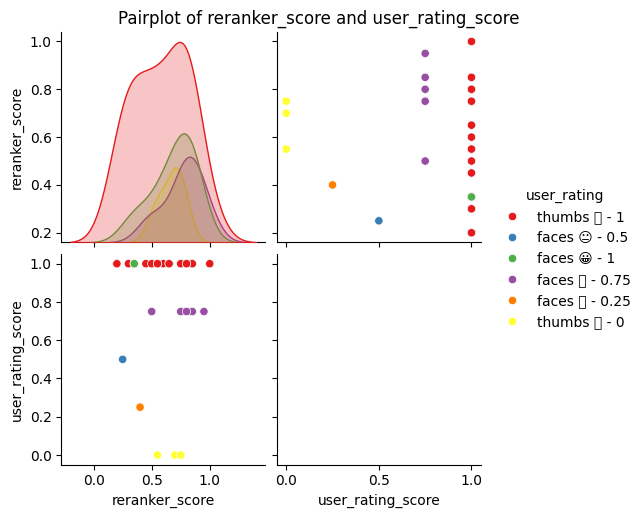

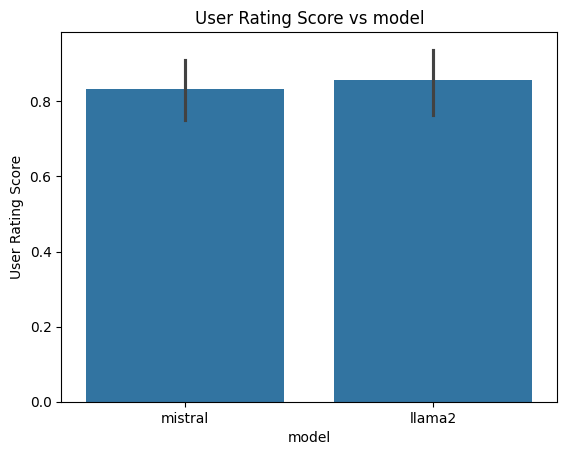

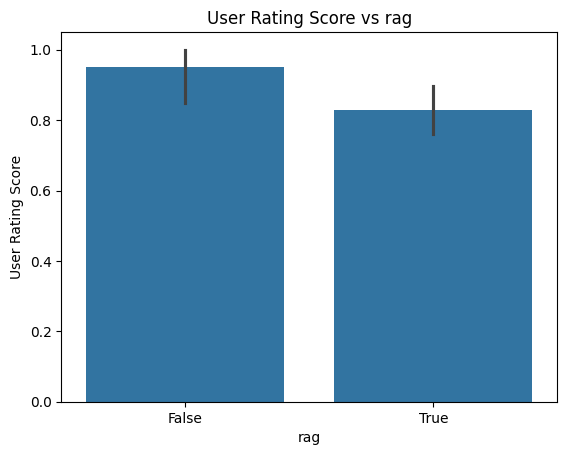

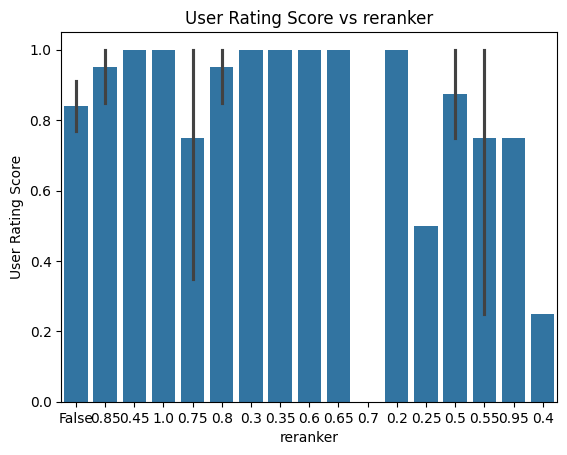

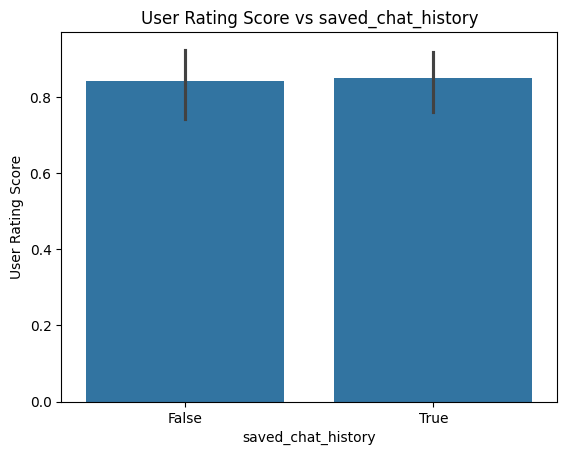

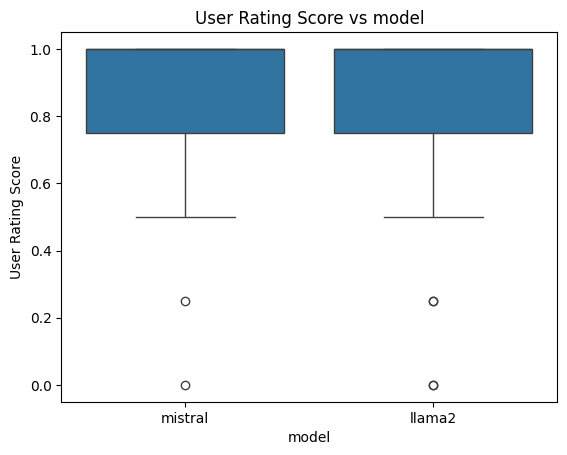

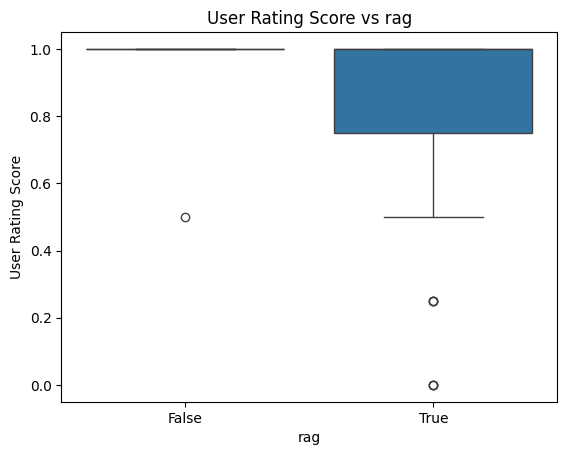

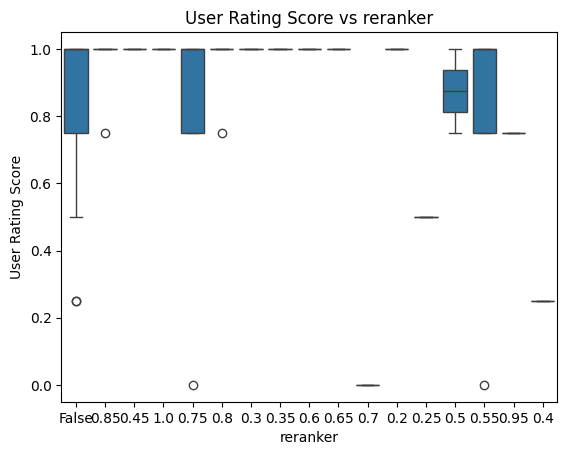

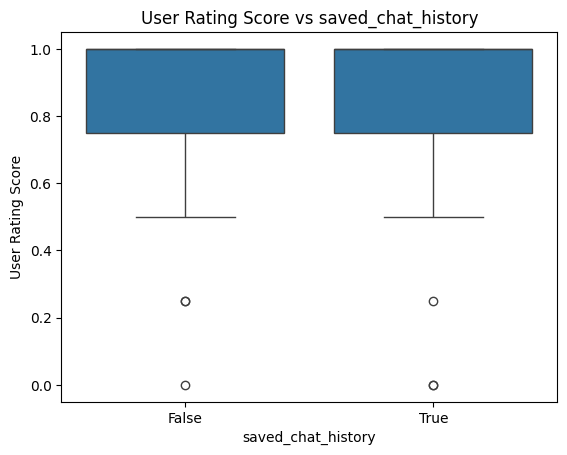

In [105]:
# Pairplot
sns.pairplot(history_df, vars=['reranker_score', 'user_rating_score'], hue='user_rating', palette='Set1')
plt.suptitle('Pairplot of reranker_score and user_rating_score', y=1.02)
plt.show()

# Bar plots
binary_features = ['model', 'rag', 'reranker', 'saved_chat_history']
for feature in binary_features:
    sns.barplot(x=feature, y='user_rating_score', data=history_df)
    plt.title(f'User Rating Score vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('User Rating Score')
    plt.show()

# Box plots
for feature in binary_features:
    sns.boxplot(x=feature, y='user_rating_score', data=history_df)
    plt.title(f'User Rating Score vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('User Rating Score')
    plt.show()


In [85]:
pivot_table = convo_df.pivot_table(index='model', columns=['rag', 'reranker', 'saved_chat_history'], values='Convo_Ave_Score', aggfunc=['mean', 'count'])
pivot_table = pivot_table.reset_index()
pivot_table

model      mean                                       \
rag                             False     True                               
reranker                            0        0            0.25  0.35   0.4   
saved_chat_history              False    False    True   False False False   
0                    llama2  0.979167  0.75000  0.9375  0.6875   NaN  0.25   
1                   mistral  0.950000  0.78125  0.8750     NaN   1.0   NaN   

                                          ... count                          \
rag                                       ...  True                           
reranker             0.5      0.65  0.75  ...     0  0.25  0.35   0.4   0.5   
saved_chat_history False     False False  ...  True False False False False   
0                    NaN  0.666667   0.8  ...   1.0   1.0   NaN   1.0   NaN   
1                    1.0       NaN   NaN  ...   1.0   NaN   1.0   NaN   1.0   

                                                  
rag                                               
reranker            0.65  0.75   0.8  0.85  0.95  
saved_chat_history False False False False False  
0                    1.0   1.0   NaN   1.0   NaN  
1                    NaN   NaN   2.0   NaN   1.0  

[2 rows x 25 columns]

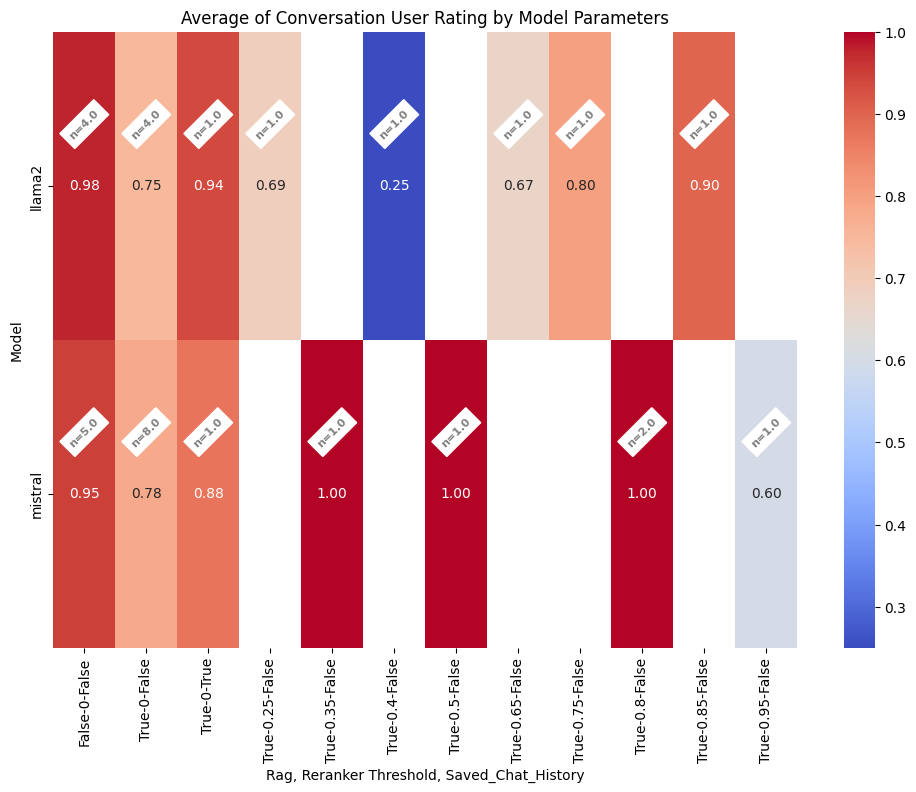

In [87]:
# Create a heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(data=pivot_table['mean'], cmap='coolwarm', annot=True, fmt=".2f", yticklabels=pivot_table['model'])
ax.set_title('Average of Conversation User Rating by Model Parameters')
ax.set_xlabel('Rag, Reranker Threshold, Saved_Chat_History')  # Set rotation here
ax.set_ylabel('Model')

# Overlay the count of observations
for i in range(pivot_table['mean'].shape[0]):
    for j in range(pivot_table['mean'].shape[1]):
        count_value = pivot_table["count"].iloc[i, j]
        if not np.isnan(count_value):
            plt.text(j+0.5, i+0.3, f'n={count_value}', ha='center', va='center', color='black', fontsize=8, fontweight='bold', rotation=45, backgroundcolor='white', alpha=0.5)

plt.show()

In [106]:
convo_df.to_csv('scores_by_convo_rag_only.csv')
history_df.to_csv('scores_by_response_rag_only.csv')

In [107]:
#added bertopic in another notebook

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
eval_cv_df.csv                   rag_output_bertopic/
falcon summary for qlora data/   recsys.ipynb
golden_answers.csv               scores_by_convo_rag_only.csv
inference.ipynb                  scores_by_response_rag_only.csv
log_analysis.ipynb               venv/
log_analysis_clean.ipynb


In [109]:
history_df = pd.read_csv('rag_output_bertopic/scores_by_response_rag_only_bertopic.csv')

In [110]:
history_df['model'].value_counts()

model
llama2     40
mistral    36
Name: count, dtype: int64

In [9]:
history_df['reranker_score'].describe()

count    37.000000
mean      0.618919
std       0.224336
min       0.200000
25%       0.450000
50%       0.650000
75%       0.800000
max       1.000000
Name: reranker_score, dtype: float64

In [10]:
history_df['user_rating_score'].describe()

count    76.000000
mean      0.845395
std       0.270700
min       0.000000
25%       0.750000
50%       1.000000
75%       1.000000
max       1.000000
Name: user_rating_score, dtype: float64

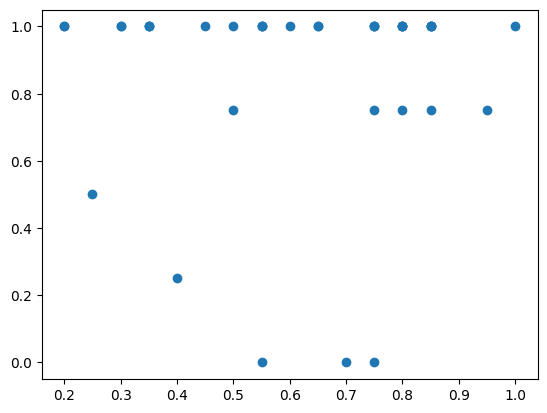

In [11]:
plt.scatter(history_df['reranker_score'],history_df['user_rating_score'])

<Axes: xlabel='reranker_score', ylabel='user_rating_score'>

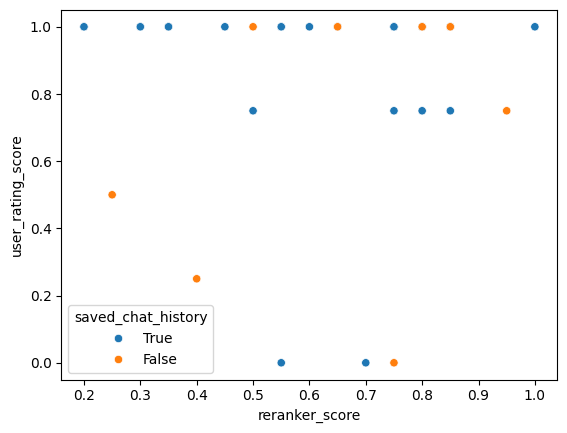

In [12]:
sns.scatterplot(data=history_df,x='reranker_score',y='user_rating_score',hue='saved_chat_history')

<Axes: xlabel='reranker_score', ylabel='user_rating_score'>

/Users/Sonia/Development/WanderChat_298b/notebooks/venv/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  func(*args, **kwargs)
/Users/Sonia/Development/WanderChat_298b/notebooks/venv/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 128078 (\N{THUMBS DOWN SIGN}) missing from current font.
  func(*args, **kwargs)
/Users/Sonia/Development/WanderChat_298b/notebooks/venv/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 128578 (\N{SLIGHTLY SMILING FACE}) missing from current font.
  func(*args, **kwargs)
/Users/Sonia/Development/WanderChat_298b/notebooks/venv/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 128577 (\N{SLIGHTLY FROWNING FACE}) missing from current font.
  func(*args, **kwargs)
/Users/Sonia/Development/WanderChat_298b/notebooks/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128077 

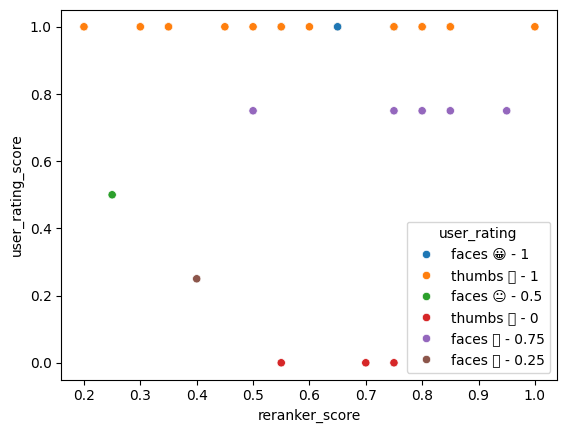

In [13]:
sns.scatterplot(data=history_df,x='reranker_score',y='user_rating_score',hue='user_rating')

<Axes: xlabel='reranker_score', ylabel='user_rating_score'>

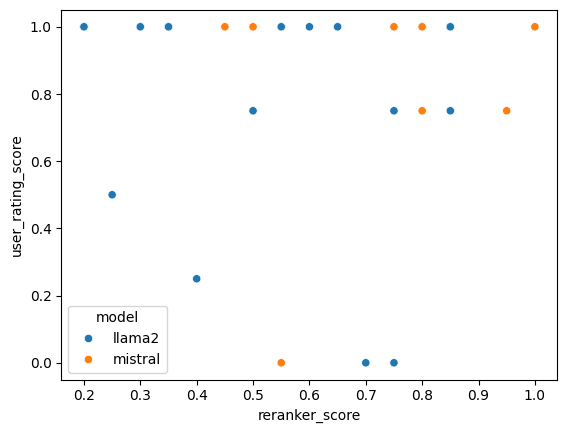

In [14]:
sns.scatterplot(data=history_df,x='reranker_score',y='user_rating_score',hue='model')

<Axes: xlabel='model', ylabel='user_rating_score'>

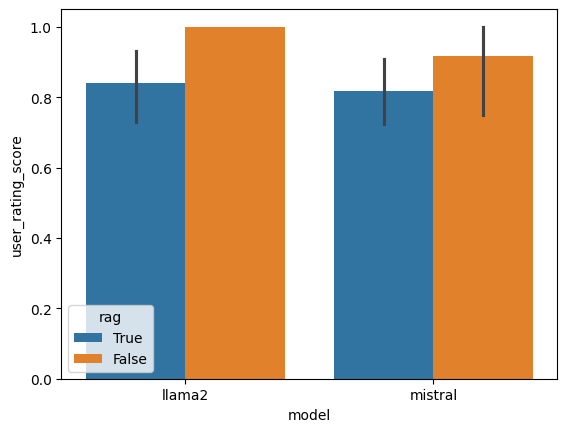

In [15]:
sns.barplot(data=history_df,x='model',y='user_rating_score',hue='rag')

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans, KMeans

vec = TfidfVectorizer(stop_words="english",ngram_range=(1,3))
vec.fit(history_df['question'])
features = vec.transform(history_df['question'])

ModuleNotFoundError: No module named 'sklearn'

In [17]:
clust = KMeans(init='k-means++',n_clusters=5,n_init=10)

clust.fit(features)

yhat=clust.predict(features)
history_df['cluster_labels'] = clust.labels_


for c in history_df['cluster_labels'].unique():
    unique_mol_types = history_df.loc[history_df.cluster_labels == c][['question','cluster_labels']].drop_duplicates()
    display(unique_mol_types)

NameError: name 'KMeans' is not defined

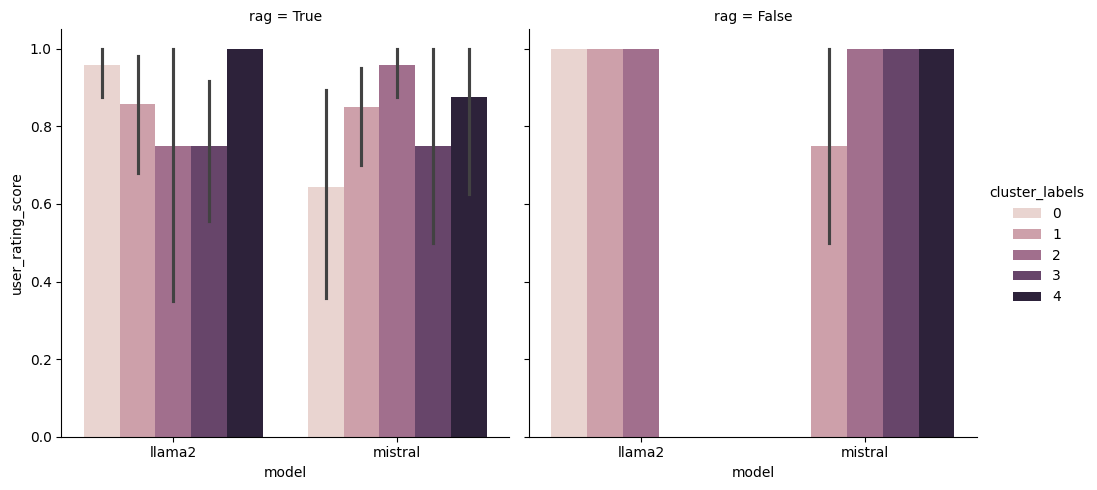

In [19]:
sns.catplot(
    data=history_df, x='model', y='user_rating_score',hue='cluster_labels',
    col='rag', kind='bar', col_wrap=2
)

In [20]:
history_df\
    .query("rag == 'True'")

,name,model,rag,reranker,saved_chat_history,question,context,response,user_rating,datetimestamp,reranker_score,user_rating_score,cluster_labels
0,2024-04-03_19-50-27.log,llama2,True,False,True,tell me more about Gyeongbokgung Palace. why d...,What are the main differences between visiting...,Gyeongbokgung Palace is a must-visit attracti...,faces 😀 - 1,2024-04-03 19:50:27,NaN,1.0,1
1,2024-04-04_13-25-18.log,llama2,True,0.55,True,what should I know ahead of time when preparin...,I want to take a cruise to Alaska in August an...,I don't know. Please give me more context. Wha...,thumbs 👍 - 1,2024-04-04 13:25:18,0.55,1.0,0
2,2024-04-04_12-12-06.log,llama2,True,0.2,True,whats the best way to get around as a solo tra...,Is Ho Chi Minh safe for a girl's solo trip? H...,I don't know. Please give me more context. The...,thumbs 👍 - 1,2024-04-04 12:12:06,0.20,1.0,2
3,2024-04-04_12-59-11.log,mistral,True,0.55,True,how can I make the most of my time during the ...,I'm planning a two-month trip to Europe in Ma...,To make the most of your two-month European a...,faces 😀 - 1,2024-04-04 12:59:11,0.55,1.0,4
4,2024-04-04_12-23-30.log,llama2,True,False,False,I'm considering booking a trip through Costco...,,"Based on the context provided, here are some a...",faces 😀 - 1,2024-04-04 12:23:30,NaN,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2024-04-04_18-53-24.log,mistral,True,False,False,I'm planning a 3-4 week family road trip from ...,,"Based on the context provided, here are some ...",thumbs 👍 - 1,2024-04-04 18:53:24,NaN,1.0,1
72,2024-04-04_11-49-07.log,llama2,True,0.65,False,I'm a 28-year-old male heading to Guangzhou fo...,"Whatever you do,be sure to visit a park,prefer...",Hello there! I'm happy to help you plan your t...,faces 😀 - 1,2024-04-04 11:49:07,0.65,1.0,1
73,2024-04-03_20-01-13.log,mistral,True,False,False,Seeking destination and activity suggestions f...,,Based on your preferences and the context pro...,thumbs 👍 - 1,2024-04-03 20:01:13,NaN,1.0,2
74,2024-04-03_19-52-12.log,llama2,True,False,True,does japan have similar historical sites? coul...,What are the main differences between visiting...,Thank you for providing the context! Based on ...,thumbs 👍 - 1,2024-04-03 19:52:12,NaN,1.0,3


In [21]:
history_df.loc[history_df['question'].isin(ref_QA.keys())].sort_values('question')\
    .query("rag == 'True'")\
    .groupby(['question','rag'])['response'].count().reset_index()

,question,rag,response
0,I'm considering booking a trip through Costco...,True,2
1,I'm planning a two-month trip to Europe in Ma...,True,2
2,Is Ho Chi Minh safe for a girl's solo trip?,True,2
3,I want to take a cruise to Alaska in August an...,True,2
4,I'm a 28-year-old male heading to Guangzhou fo...,True,2
5,I'm planning a 3-4 week family road trip from ...,True,3
6,I'm taking a solo trip with my dog around Than...,True,2
7,Seeking destination and activity suggestions f...,True,2
8,What are the main differences between visiting...,True,3
9,What are your favorite luxury camp meals for a...,True,2


In [22]:
from langchain.chains import ConversationalRetrievalChain
from sentence_transformers import SentenceTransformer, util
from langchain_community.embeddings import HuggingFaceEmbeddings # import hf embedding
from langchain_community.vectorstores import Chroma
from langchain_community.llms import Ollama
from tqdm import tqdm
import time
import random

model = SentenceTransformer('sentence-transformers/multi-qa-MiniLM-L6-cos-v1')


def reranker(query,retrievals, corr_field,thres=0.5):
    query_emb = model.encode(query)
    doc_emb = model.encode(corr_field)
    scores = util.dot_score(query_emb, doc_emb)[0].cpu().tolist()
    doc_score_pairs = list(zip(retrievals, scores))
    doc_score_pairs = sorted(doc_score_pairs, key=lambda x: x[1], reverse=True)
    return ([(doc,score) for doc,score in doc_score_pairs if score>thres])

def load_llm(mc):
    llm = Ollama(model=mc)
    return llm

def load_RAG_db():
    # Create embeddings using Sentence Transformers
    embeddings = HuggingFaceEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2', model_kwargs={'device': 'cpu'})
    reddit_db = Chroma(persist_directory="/Users/christopherton/Desktop/SJSU_MSDA/WanderChat/vector_db/new_reddit_chroma_responses_db",embedding_function= embeddings)
    return reddit_db

def create_prompt(user_query, context):
    prompt = """[INST] If context is empty, say "I don't know. Please give me more context". Answer the query using the information in the documents provided in the context.
    If the information is not available in the context or the document is empty or is irrelevant to the query, say so. Do not make up information.
    Explain in which document you found the information. Do not repeat the question and context, or explicity refer to the context, explain as if you're speaking to a 
    clueless traveler. 
    
    Query: {}, Context: {}[/INST]""".format(user_query,context)
    return prompt

def crc_response(llm,db,q):
    start_time = time.time()
    chain = ConversationalRetrievalChain.from_llm(llm=llm, retriever=db.as_retriever())
    res = chain({"question": q,"chat_history": []})
    elapsed_time = time.time() - start_time
    return res, elapsed_time

db = load_RAG_db()

In [23]:
def add_median_labels(ax,fmt='.3f'):
    lines=ax.get_lines()
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines)/len(boxes))
    for median in lines[4:len(lines):lines_per_box]:
        x, y = (data.mean() for data in median.get_data())
        value = x if (median.get_xdata()[1] - median.get_xdata()[0]) == 0 else y
        text = ax.text(x,y,f'{value:{fmt}}',ha='center',va='center',
                       fontweight='bold',color='white')
        text.set_path_effects([
            path_effects.Stroke(linewidth=3,foreground=median.get_color()),path_effects.Normal()
        ])

In [401]:
# eval_cv = {q:{'CRC':
#                 {'llama2':{
#                     'scores':[],'elapsed_time':[]},
#                   'mistral':{
#                   'scores':[],'elapsed_time':[]}},
#               'RR':
#                 {'llama2':{
#                   'scores':[],'elapsed_time':[]},
#                 'mistral':{
#                   'scores':[],'elapsed_time':[]}}
#               } for q in ref_QA.keys()}

In [452]:
# pretrained + reranker
# hypothesis: what threshold is best for reranker

num_thresholds = 10

for i,query in enumerate(tqdm(ref_QA.keys())):
#for i,query in enumerate(tqdm(list(ref_QA.keys())[-2:])):
#for i,query in enumerate(tqdm(list(ref_QA.keys())[:2])):
    #embed response to input query
    query_emb = model.encode(ref_QA.get(query))
    for mc in ['llama2','mistral']:
        #print(mc)
        #start timer
        start_time = time.time()
        # load llm model
        llm = load_llm(mc)
        ###-------------------------------------------------------------------------------------------------------------------------
        #load chain and process responses for default RAG
        crc_results,crc_time = crc_response(llm,db,query)
        
        ### Calculate dot for CRC
        crc_results_emb = model.encode([crc_results["answer"]])
        crc_scores = util.dot_score(query_emb, crc_results_emb)[0].cpu().tolist()
        crc_dot_zipped = list(zip(crc_scores,[crc_results["answer"]]))
        
        #store CRC results
        print(f"appending {mc} CRC response")
        eval_cv[query]['CRC'][mc]['scores'].append(crc_dot_zipped)
        eval_cv[query]['CRC'][mc]['elapsed_time'] = crc_time
        
        ###-------------------------------------------------------------------------------------------------------------------------
        #similarity search
        rag_contexts = db.similarity_search(query)
        # get default question label for comparison
        candidate_matches = [d.metadata['selftext'] for d in rag_contexts if 'selftext' in d.metadata.keys()]
        #print(candidate_matches)
        
        #init lists to store results
        results = []
        #results_rag, results_rr = [],[]
        rand_rr_thres = []
        
        #generate n responses based on random reranker thresholds
        for j,r in enumerate(range(num_thresholds)):
            #reranker
            rand_thres = round(random.choice( [0.05 * i for i in range(20)]),2)
            rand_rr_thres.append(rand_thres)
            reranked_contexts = reranker(query,rag_contexts,candidate_matches,rand_thres)
            full_context = ' '.join([f[0].page_content for f in reranked_contexts])
            prompt = create_prompt(query,full_context)
            #print(f'geneerating LLM response from prompt {prompt}')
            results.append(llm.invoke(prompt))
            print(f"appending {mc} response # {j} from threshold of {rand_thres}")

        print(f"encoding set of {len(results)} responses for evaluation")

        ### Calculate dot for RR
        #encode set of model responses
        results_emb = model.encode(results)
        #calculate dot metric for similarity between ground truth and response
        scores = util.dot_score(query_emb, results_emb)[0].cpu().tolist()
        #align thresholds and dot scores
        rr_dot_zipped = list(zip(rand_rr_thres, scores,results))
        
        #stop timer
        elapsed_time = time.time() - start_time
            
        #store results
        
        
        eval_cv[query]['RR'][mc]['scores'].append(rr_dot_zipped)
        eval_cv[query]['RR'][mc]['elapsed_time'] = elapsed_time
        
        print('Query [{}/{}], Model [{}], CRC: Total time: {} seconds, CRC: Dot score: {}, RR: Total time for {} responses: {} seconds, RR: Dot scores for each of the {} random thresholds: {}'
               .format(i+1, len(ref_QA.keys()), mc, crc_time, crc_scores, num_thresholds, elapsed_time, num_thresholds,scores))

  0%|          | 0/11 [00:00<?, ?it/s]

appending llama2 CRC response
appending llama2 response # 0 from threshold of 0.25
appending llama2 response # 1 from threshold of 0.05
appending llama2 response # 2 from threshold of 0.5
appending llama2 response # 3 from threshold of 0.3
appending llama2 response # 4 from threshold of 0.5
appending llama2 response # 5 from threshold of 0.8
appending llama2 response # 6 from threshold of 0.25
appending llama2 response # 7 from threshold of 0.4
appending llama2 response # 8 from threshold of 0.0
appending llama2 response # 9 from threshold of 0.45
encoding set of 10 responses for evaluation
Query [1/11], Model [llama2], CRC: Total time: 21.736128091812134 seconds, CRC: Dot score: [0.6320691108703613], RR: Total time for 10 responses: 245.73268914222717 seconds, RR: Dot scores for each of the 10 random thresholds: [0.5798170566558838, 0.664516806602478, 0.7007632255554199, 0.7193763852119446, 0.6136142015457153, 0.5556155443191528, 0.6751309633255005, 0.6295663714408875, 0.5314978361129

  9%|▉         | 1/11 [07:14<1:12:29, 434.90s/it]

Query [1/11], Model [mistral], CRC: Total time: 23.179161071777344 seconds, CRC: Dot score: [0.7008020877838135], RR: Total time for 10 responses: 189.0972192287445 seconds, RR: Dot scores for each of the 10 random thresholds: [0.6190694570541382, 0.6316019296646118, 0.6575740575790405, 0.6374554634094238, 0.6182221174240112, 0.6561298370361328, 0.659151554107666, 0.6668847799301147, 0.6019397974014282, 0.6520463824272156]
appending llama2 CRC response
appending llama2 response # 0 from threshold of 0.15
appending llama2 response # 1 from threshold of 0.35
appending llama2 response # 2 from threshold of 0.5
appending llama2 response # 3 from threshold of 0.15
appending llama2 response # 4 from threshold of 0.7
appending llama2 response # 5 from threshold of 0.45
appending llama2 response # 6 from threshold of 0.25
appending llama2 response # 7 from threshold of 0.7
appending llama2 response # 8 from threshold of 0.6
appending llama2 response # 9 from threshold of 0.25
encoding set of 1

 18%|█▊        | 2/11 [13:53<1:02:01, 413.54s/it]

Query [2/11], Model [mistral], CRC: Total time: 25.642201900482178 seconds, CRC: Dot score: [0.9199248552322388], RR: Total time for 10 responses: 175.74015522003174 seconds, RR: Dot scores for each of the 10 random thresholds: [0.9087557792663574, 0.8561545610427856, 0.9096881151199341, 0.9146813154220581, 0.9148778319358826, 0.8580532670021057, 0.8852545022964478, 0.9265668392181396, 0.8642281293869019, 0.9101654291152954]
appending llama2 CRC response
appending llama2 response # 0 from threshold of 0.9
appending llama2 response # 1 from threshold of 0.7
appending llama2 response # 2 from threshold of 0.8
appending llama2 response # 3 from threshold of 0.55
appending llama2 response # 4 from threshold of 0.4
appending llama2 response # 5 from threshold of 0.3
appending llama2 response # 6 from threshold of 0.85
appending llama2 response # 7 from threshold of 0.1
appending llama2 response # 8 from threshold of 0.85
appending llama2 response # 9 from threshold of 0.4
encoding set of 10

 27%|██▋       | 3/11 [21:09<56:29, 423.75s/it]  

Query [3/11], Model [mistral], CRC: Total time: 30.006978034973145 seconds, CRC: Dot score: [0.8644116520881653], RR: Total time for 10 responses: 205.51665997505188 seconds, RR: Dot scores for each of the 10 random thresholds: [0.7876790165901184, 0.8180132508277893, 0.7852040529251099, 0.8010621666908264, 0.7238637208938599, 0.8044325113296509, 0.8025972843170166, 0.8142985701560974, 0.7810546159744263, 0.7301720380783081]
appending llama2 CRC response
appending llama2 response # 0 from threshold of 0.1
appending llama2 response # 1 from threshold of 0.2
appending llama2 response # 2 from threshold of 0.15
appending llama2 response # 3 from threshold of 0.35
appending llama2 response # 4 from threshold of 0.15
appending llama2 response # 5 from threshold of 0.2
appending llama2 response # 6 from threshold of 0.55
appending llama2 response # 7 from threshold of 0.7
appending llama2 response # 8 from threshold of 0.1
appending llama2 response # 9 from threshold of 0.85
encoding set of 

 36%|███▋      | 4/11 [31:32<58:36, 502.41s/it]

Query [4/11], Model [mistral], CRC: Total time: 20.206379175186157 seconds, CRC: Dot score: [0.9114135503768921], RR: Total time for 10 responses: 407.76245975494385 seconds, RR: Dot scores for each of the 10 random thresholds: [0.8413761854171753, 0.8915395736694336, 0.9096518754959106, 0.9102575182914734, 0.9207873344421387, 0.8889975547790527, 0.8310279846191406, 0.9062259197235107, 0.914737343788147, 0.8867210745811462]
appending llama2 CRC response
appending llama2 response # 0 from threshold of 0.45
appending llama2 response # 1 from threshold of 0.9
appending llama2 response # 2 from threshold of 0.75
appending llama2 response # 3 from threshold of 0.8
appending llama2 response # 4 from threshold of 0.05
appending llama2 response # 5 from threshold of 0.35
appending llama2 response # 6 from threshold of 0.4
appending llama2 response # 7 from threshold of 0.35
appending llama2 response # 8 from threshold of 0.6
appending llama2 response # 9 from threshold of 0.85
encoding set of 

 45%|████▌     | 5/11 [1:03:08<1:40:30, 1005.15s/it]

Query [5/11], Model [mistral], CRC: Total time: 24.516409158706665 seconds, CRC: Dot score: [0.7534156441688538], RR: Total time for 10 responses: 882.2949419021606 seconds, RR: Dot scores for each of the 10 random thresholds: [0.7113901376724243, 0.730617344379425, 0.5651122331619263, 0.7424319982528687, 0.7832276225090027, 0.7441309690475464, 0.7724066972732544, 0.7774768471717834, 0.8155229091644287, 0.7395663261413574]
appending llama2 CRC response
appending llama2 response # 0 from threshold of 0.1
appending llama2 response # 1 from threshold of 0.75
appending llama2 response # 2 from threshold of 0.85
appending llama2 response # 3 from threshold of 0.3
appending llama2 response # 4 from threshold of 0.7
appending llama2 response # 5 from threshold of 0.25
appending llama2 response # 6 from threshold of 0.3
appending llama2 response # 7 from threshold of 0.35
appending llama2 response # 8 from threshold of 0.2
appending llama2 response # 9 from threshold of 0.0
encoding set of 10 

 55%|█████▍    | 6/11 [1:28:17<1:38:01, 1176.31s/it]

appending mistral response # 9 from threshold of 0.7
encoding set of 10 responses for evaluation
Query [6/11], Model [mistral], CRC: Total time: 11.972472906112671 seconds, CRC: Dot score: [0.798798680305481], RR: Total time for 10 responses: 969.9584648609161 seconds, RR: Dot scores for each of the 10 random thresholds: [0.7197663187980652, 0.6583695411682129, 0.73661869764328, 0.7235058546066284, 0.6775491833686829, 0.6537958383560181, 0.726051390171051, 0.7306114435195923, 0.6212742328643799, 0.7612918615341187]
appending llama2 CRC response
appending llama2 response # 0 from threshold of 0.7
appending llama2 response # 1 from threshold of 0.35
appending llama2 response # 2 from threshold of 0.3
appending llama2 response # 3 from threshold of 0.15
appending llama2 response # 4 from threshold of 0.55
appending llama2 response # 5 from threshold of 0.2
appending llama2 response # 6 from threshold of 0.3
appending llama2 response # 7 from threshold of 0.45
appending llama2 response # 8

 64%|██████▎   | 7/11 [1:54:22<1:26:54, 1303.50s/it]

Query [7/11], Model [mistral], CRC: Total time: 23.829970359802246 seconds, CRC: Dot score: [0.8217579126358032], RR: Total time for 10 responses: 256.7454011440277 seconds, RR: Dot scores for each of the 10 random thresholds: [0.8969306945800781, 0.8200199604034424, 0.8100486397743225, 0.8181811571121216, 0.785239577293396, 0.8460106253623962, 0.8125028610229492, 0.849686861038208, 0.7626391649246216, 0.8802565336227417]
appending llama2 CRC response
appending llama2 response # 0 from threshold of 0.05
appending llama2 response # 1 from threshold of 0.1
appending llama2 response # 2 from threshold of 0.2
appending llama2 response # 3 from threshold of 0.7
appending llama2 response # 4 from threshold of 0.5
appending llama2 response # 5 from threshold of 0.7
appending llama2 response # 6 from threshold of 0.1
appending llama2 response # 7 from threshold of 0.7
appending llama2 response # 8 from threshold of 0.65
appending llama2 response # 9 from threshold of 0.85
encoding set of 10 re

 73%|███████▎  | 8/11 [2:00:59<50:44, 1014.69s/it]  

appending mistral response # 9 from threshold of 0.65
encoding set of 10 responses for evaluation
Query [8/11], Model [mistral], CRC: Total time: 11.043345928192139 seconds, CRC: Dot score: [0.6979390382766724], RR: Total time for 10 responses: 123.86975383758545 seconds, RR: Dot scores for each of the 10 random thresholds: [0.79963219165802, 0.7235468626022339, 0.8361837267875671, 0.8012576103210449, 0.7940998077392578, 0.8582969307899475, 0.8911654949188232, 0.6568416357040405, 0.9187437295913696, 0.8776203393936157]
appending llama2 CRC response
appending llama2 response # 0 from threshold of 0.05
appending llama2 response # 1 from threshold of 0.35
appending llama2 response # 2 from threshold of 0.65
appending llama2 response # 3 from threshold of 0.8
appending llama2 response # 4 from threshold of 0.2
appending llama2 response # 5 from threshold of 0.3
appending llama2 response # 6 from threshold of 0.3
appending llama2 response # 7 from threshold of 0.15
appending llama2 response

 82%|████████▏ | 9/11 [2:09:19<28:27, 853.85s/it] 

Query [9/11], Model [mistral], CRC: Total time: 117.69443130493164 seconds, CRC: Dot score: [0.8030496835708618], RR: Total time for 10 responses: 262.7186322212219 seconds, RR: Dot scores for each of the 10 random thresholds: [0.8399796485900879, 0.8207136392593384, 0.8066580295562744, 0.8337994813919067, 0.8531526327133179, 0.7935433387756348, 0.7551653981208801, 0.8132967948913574, 0.8271393775939941, 0.8331738710403442]
appending llama2 CRC response
appending llama2 response # 0 from threshold of 0.9
appending llama2 response # 1 from threshold of 0.3
appending llama2 response # 2 from threshold of 0.3
appending llama2 response # 3 from threshold of 0.55
appending llama2 response # 4 from threshold of 0.45
appending llama2 response # 5 from threshold of 0.6
appending llama2 response # 6 from threshold of 0.35
appending llama2 response # 7 from threshold of 0.5
appending llama2 response # 8 from threshold of 0.25
appending llama2 response # 9 from threshold of 0.9
encoding set of 10

 91%|█████████ | 10/11 [2:35:50<18:01, 1081.45s/it]

Query [10/11], Model [mistral], CRC: Total time: 16.317587852478027 seconds, CRC: Dot score: [0.49774205684661865], RR: Total time for 10 responses: 348.63224697113037 seconds, RR: Dot scores for each of the 10 random thresholds: [0.746139407157898, 0.7812419533729553, 0.7905822992324829, 0.716678261756897, 0.8586679697036743, 0.6592020988464355, 0.7569949626922607, 0.8211396932601929, 0.7900179624557495, 0.7179022431373596]
appending llama2 CRC response
appending llama2 response # 0 from threshold of 0.1
appending llama2 response # 1 from threshold of 0.35
appending llama2 response # 2 from threshold of 0.9
appending llama2 response # 3 from threshold of 0.6
appending llama2 response # 4 from threshold of 0.55
appending llama2 response # 5 from threshold of 0.05
appending llama2 response # 6 from threshold of 0.35
appending llama2 response # 7 from threshold of 0.5
appending llama2 response # 8 from threshold of 0.5
appending llama2 response # 9 from threshold of 0.3
encoding set of 1

100%|██████████| 11/11 [2:48:38<00:00, 919.84s/it] 

appending mistral response # 9 from threshold of 0.85
encoding set of 10 responses for evaluation
Query [11/11], Model [mistral], CRC: Total time: 26.90440011024475 seconds, CRC: Dot score: [0.8151451349258423], RR: Total time for 10 responses: 225.00744581222534 seconds, RR: Dot scores for each of the 10 random thresholds: [0.8651397228240967, 0.8181498050689697, 0.8408253788948059, 0.8973894715309143, 0.8285883665084839, 0.847196638584137, 0.8347716331481934, 0.8538724184036255, 0.8318204879760742, 0.7593297958374023]


In [24]:
# with open(f'eval_cv_CRC_RR_{len(eval_cv)}.json', 'w') as fp:
#     json.dump(eval_cv, fp)

In [25]:
with open('eval_cv_CRC_RR.json') as f:
    exp1 = json.load(f)
    
with open('eval_cv_CRC_RR_11.json') as f:
    exp2 = json.load(f)

In [26]:
def transform_cv_df(eval_cv):

    eval_cv_df = pd.DataFrame.from_dict({(i,j): eval_cv[i][j] 
                            for i in eval_cv.keys() 
                            for j in eval_cv[i].keys()},
                        orient='index').reset_index()
    eval_cv_df.rename(columns={'level_0':'question','level_1':'model'},inplace=True)


    CRC_df = eval_cv_df.loc[eval_cv_df['model']=='CRC'].reset_index(drop=True)
    crc_cols = ['question','llm','dot','time','response']

    CRC_df_llama2 = pd.DataFrame(columns=crc_cols)
    CRC_df_mistral = pd.DataFrame(columns=crc_cols)

    for i,r in CRC_df.iterrows():
        
        temp_llama2 = pd.DataFrame(r['llama2']['scores'][0],columns=['dot','response'])
        temp_llama2['question'] = r['question']
        temp_llama2['llm'] = 'llama2_CRC'
        temp_llama2['time'] = r['llama2']['elapsed_time']
        temp_llama2 = temp_llama2[crc_cols]
        CRC_df_llama2 = pd.concat([CRC_df_llama2,temp_llama2], axis=0, ignore_index=True)
        
        temp_mistral = pd.DataFrame(r['mistral']['scores'][0],columns=['dot','response'])
        temp_mistral['question'] = r['question']
        temp_mistral['llm'] = 'mistral_CRC'
        temp_mistral['time'] = r['mistral']['elapsed_time']
        temp_mistral = temp_mistral[crc_cols]
        CRC_df_mistral = pd.concat([CRC_df_mistral,temp_mistral], axis=0, ignore_index=True)
        
    CRC_df_llama2 = CRC_df_llama2.sort_values('question').reset_index(drop=True)
    CRC_df_mistral = CRC_df_mistral.sort_values('question').reset_index(drop=True)

    concat_CRC = pd.concat([CRC_df_llama2,CRC_df_mistral],axis=0,ignore_index=True).query('dot > 0')
    concat_CRC['idk'] = np.where(concat_CRC['response'].str.contains("I don't know."),'idk','answered')
    concat_CRC['threshold'] = np.nan

    RR_df = eval_cv_df.loc[eval_cv_df['model']=='RR'].reset_index(drop=True)
    rr_cols = ['question','llm','threshold','dot','time','response']

    RR_df_llama2 = pd.DataFrame(columns=rr_cols)
    RR_df_mistral = pd.DataFrame(columns=rr_cols)

    for i,r in RR_df.iterrows():
        
        temp_llama2 = pd.DataFrame(r['llama2']['scores'][0],columns=['threshold','dot','response'])
        temp_llama2['question'] = r['question']
        temp_llama2['llm'] = 'llama2_RR'
        temp_llama2['time'] = r['llama2']['elapsed_time']
        temp_llama2 = temp_llama2[rr_cols]
        RR_df_llama2 = pd.concat([RR_df_llama2,temp_llama2], axis=0, ignore_index=True)
        
        temp_mistral = pd.DataFrame(r['mistral']['scores'][0],columns=['threshold','dot','response'])
        temp_mistral['question'] = r['question']
        temp_mistral['llm'] = 'mistral_RR'
        temp_mistral['time'] = r['mistral']['elapsed_time']
        temp_mistral = temp_mistral[rr_cols]
        RR_df_mistral = pd.concat([RR_df_mistral,temp_mistral], axis=0, ignore_index=True)
        
    RR_df_llama2 = RR_df_llama2.sort_values('question')
    RR_df_mistral = RR_df_mistral.sort_values('question')

    concat_RR = pd.concat([RR_df_llama2,RR_df_mistral],axis=0,ignore_index=True).query('dot > 0')
    concat_RR['idk'] = np.where(concat_RR['response'].str.contains("I don't know."),'idk','answered')

    #display(concat_RR[['threshold','dot']].corr())

    concat_final = pd.concat([concat_CRC,concat_RR],axis=0,ignore_index=True).query('dot > 0')
    #filter for thresholds of at least 0.33
    plot_df = concat_final[~((concat_final['llm'].str.contains('_RR')) & (concat_final['threshold'] < 0.33))]
    return plot_df


In [27]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
def compute_cosine_similarity(text1, text2):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([text1, text2])
    return cosine_similarity(tfidf_matrix)[0, 1]

In [28]:
df1 = transform_cv_df(exp1)
df2 = transform_cv_df(exp2)

ref_QMPC = ref[['Golden Question','Golden Answer - SM','Unnamed: 4']].rename(columns={'Golden Question':'question','Golden Answer - SM':'gt','Unnamed: 4':'response'})
ref_QMPC['llm'] = 'MPC'
ref_QMPC['idk'] = np.where(ref_QMPC['response'].str.contains("I don't know."),'idk','answered')
ref_QMPC['time'] = np.nan
ref_QMPC['threshold'] = np.nan

for i,r in ref_QMPC.iterrows():
    gt_emb = model.encode(r['gt'])
    mpc_emb = model.encode([r['response']])
    score = util.dot_score(gt_emb, mpc_emb)[0].cpu().tolist()
    ref_QMPC.loc[i,'dot'] = score[0]
    ref_QMPC.loc[i,'cosine'] = compute_cosine_similarity(r['gt'], r['response'])

concat_final = pd.concat([df1,df2,ref_QMPC[df1.columns]],axis=0,ignore_index=True).drop_duplicates()
print('original shape',concat_final.shape)
concat_final_clean = concat_final.loc[concat_final.time < 400]
print('after dropping outliers',concat_final_clean.shape)

concat_final

original shape (341, 7)
after dropping outliers (276, 7)


,question,llm,dot,time,response,idk,threshold
0,I'm considering booking a trip through Costco...,llama2_CRC,0.828070,18.464432,I can provide some general information about C...,answered,NaN
1,I'm planning a two-month trip to Europe in Ma...,llama2_CRC,0.826607,29.525530,Thank you for providing me with this informati...,answered,NaN
2,Is Ho Chi Minh safe for a girl's solo trip?,llama2_CRC,0.829345,28.307015,I cannot provide a definitive answer to whethe...,answered,NaN
3,I want to take a cruise to Alaska in August an...,llama2_CRC,0.697830,21.711528,"Based on the provided context, here is the ans...",answered,NaN
4,I'm a 28-year-old male heading to Guangzhou fo...,llama2_CRC,0.710543,39.488971,"Based on your interests, here are some recomme...",idk,NaN
...,...,...,...,...,...,...,...
336,I'm a 28-year-old male heading to Guangzhou fo...,MPC,0.792607,NaN,Hello there! It sounds like you have an exciti...,answered,NaN
337,Is Ho Chi Minh safe for a girl's solo trip?,MPC,0.844453,NaN,"Absolutely, Ho Chi Minh is generally considere...",answered,NaN
338,I'm considering booking a trip through Costco...,MPC,0.830770,NaN,"I haven't personally used Costco Travel, but I...",answered,NaN
339,I'm planning a two-month trip to Europe in Ma...,MPC,0.764858,NaN,That sounds like an amazing adventure! There a...,answered,NaN


In [30]:
concat_final.nunique()

question      12
llm            5
dot          176
time          88
response     176
idk            2
threshold     13
dtype: int64

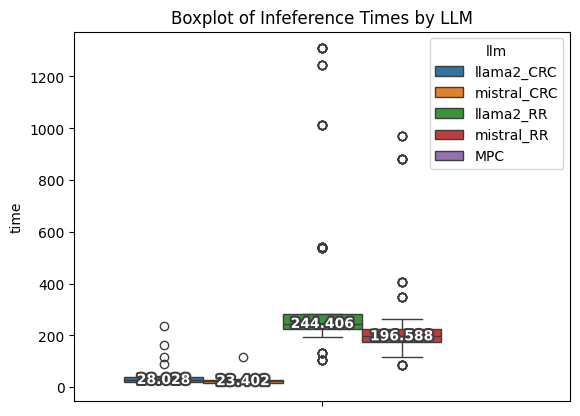

In [31]:
ax = sns.boxplot(data=concat_final,y='time',hue='llm')
ax.set_title("Boxplot of Infeference Times by LLM")
add_median_labels(ax)

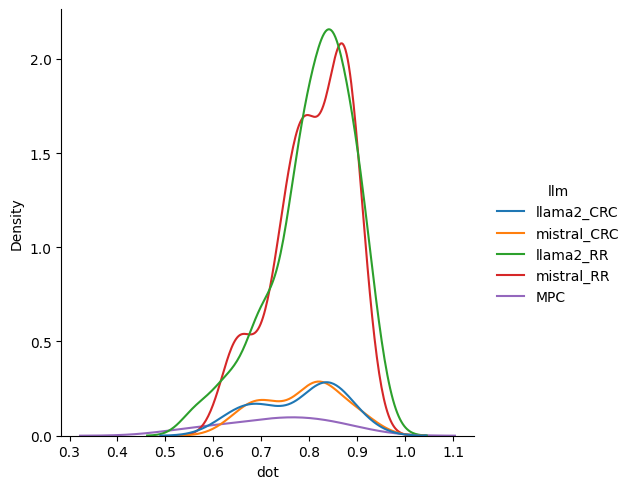

In [33]:
ax = sns.displot(data=concat_final,x='dot',hue='llm',kind="kde")
#ax.set_title("Boxplot of Dot Scores by LLM")

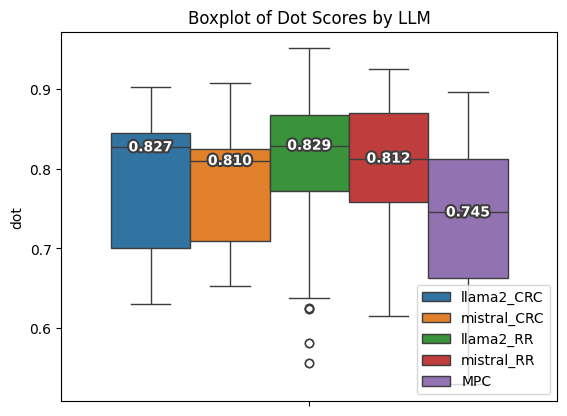

In [34]:
ax = sns.boxplot(data=concat_final,y='dot',hue='llm')
ax.set_title("Boxplot of Dot Scores by LLM")
plt.legend(loc='lower right')
add_median_labels(ax)

In [35]:
pd.crosstab(concat_final['llm'], concat_final['idk'])

idk,answered,idk
llm,,
MPC,11,0
llama2_CRC,20,2
llama2_RR,134,14
mistral_CRC,22,0
mistral_RR,138,0


In [40]:
concat_final

,question,llm,dot,time,response,idk,threshold
0,I'm considering booking a trip through Costco...,llama2_CRC,0.828070,18.464432,I can provide some general information about C...,answered,NaN
1,I'm planning a two-month trip to Europe in Ma...,llama2_CRC,0.826607,29.525530,Thank you for providing me with this informati...,answered,NaN
2,Is Ho Chi Minh safe for a girl's solo trip?,llama2_CRC,0.829345,28.307015,I cannot provide a definitive answer to whethe...,answered,NaN
3,I want to take a cruise to Alaska in August an...,llama2_CRC,0.697830,21.711528,"Based on the provided context, here is the ans...",answered,NaN
4,I'm a 28-year-old male heading to Guangzhou fo...,llama2_CRC,0.710543,39.488971,"Based on your interests, here are some recomme...",idk,NaN
...,...,...,...,...,...,...,...
336,I'm a 28-year-old male heading to Guangzhou fo...,MPC,0.792607,NaN,Hello there! It sounds like you have an exciti...,answered,NaN
337,Is Ho Chi Minh safe for a girl's solo trip?,MPC,0.844453,NaN,"Absolutely, Ho Chi Minh is generally considere...",answered,NaN
338,I'm considering booking a trip through Costco...,MPC,0.830770,NaN,"I haven't personally used Costco Travel, but I...",answered,NaN
339,I'm planning a two-month trip to Europe in Ma...,MPC,0.764858,NaN,That sounds like an amazing adventure! There a...,answered,NaN


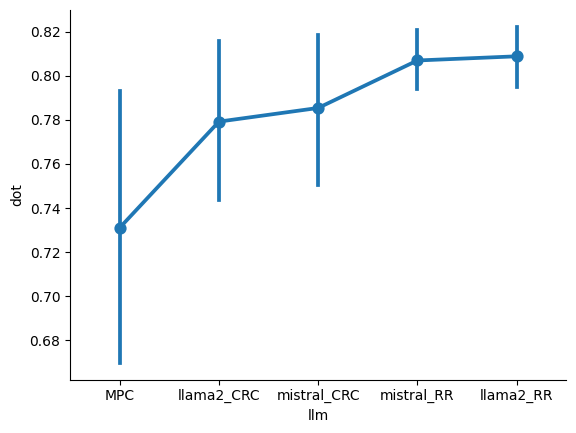

In [44]:
ax = sns.pointplot(y='dot', x = 'llm', data = concat_final,order=['MPC','llama2_CRC','mistral_CRC','mistral_RR','llama2_RR'])
sns.despine()

In [177]:
import pingouin as pg

# pairwise t-tests with Holm correction
pg.pairwise_tests(dv='dot', 
                   between='llm', 
                   padjust='holm', 
                   data=concat_final)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,llm,MPC,llama2_CRC,False,True,-1.249457,16.301760,two-sided,0.229141,1.000000,holm,0.622,-0.489547
1,llm,MPC,llama2_RR,False,True,-2.257005,10.886345,two-sided,0.045567,0.455668,holm,2.343,-0.885066
2,llm,MPC,mistral_CRC,False,True,-1.433473,15.433673,two-sided,0.171670,1.000000,holm,0.746,-0.575288
3,llm,MPC,mistral_RR,False,True,-2.207929,10.772218,two-sided,0.049891,0.455668,holm,2.142,-0.943277
4,llm,llama2_CRC,llama2_RR,False,True,-1.488606,27.335735,two-sided,0.148038,1.000000,holm,0.615,-0.343929
5,llm,llama2_CRC,mistral_CRC,False,True,-0.243669,42.000000,two-sided,0.808674,1.000000,holm,0.305,-0.072149
6,llm,llama2_CRC,mistral_RR,False,True,-1.404697,26.493392,two-sided,0.171728,1.000000,holm,0.555,-0.351132
7,llm,llama2_RR,mistral_CRC,False,True,1.256070,28.413527,two-sided,0.219321,1.000000,holm,0.467,0.274540
8,llm,llama2_RR,mistral_RR,False,True,0.196565,283.703387,two-sided,0.844309,1.000000,holm,0.133,0.023116
9,llm,mistral_CRC,mistral_RR,False,True,-1.165205,27.421385,two-sided,0.253972,1.000000,holm,0.426,-0.275911


In [183]:
concat_final.llm.unique()

['MPC','llama2_CRC','mistral_CRC','llama2_RR','mistral_RR']

array(['llama2_CRC', 'mistral_CRC', 'llama2_RR', 'mistral_RR', 'MPC'],
      dtype=object)

In [189]:
from scipy import stats

for l in ['MPC','llama2_CRC','mistral_CRC','llama2_RR','mistral_RR']:
    for m in ['MPC','llama2_CRC','mistral_CRC','llama2_RR','mistral_RR']:
        if l != m:

            v1 = concat_final.loc[concat_final['llm'] == l]['dot']
            v2 = concat_final.loc[concat_final['llm'] == m]['dot']

            # Perform the t-test:
            t_stat, p_value = stats.ttest_ind(v1,v2)

            # Interpret the results:
            alpha = 0.05
            if p_value < alpha:
                    print(f"\t Reject the null hypothesis; there is a significant difference between {l} and {m}.")
            else:
                print(f"Fail to reject the null hypothesis; there is no significant difference between {l} and {m}.")

Fail to reject the null hypothesis; there is no significant difference between MPC and llama2_CRC.
Fail to reject the null hypothesis; there is no significant difference between MPC and mistral_CRC.
	 Reject the null hypothesis; there is a significant difference between MPC and llama2_RR.
	 Reject the null hypothesis; there is a significant difference between MPC and mistral_RR.
Fail to reject the null hypothesis; there is no significant difference between llama2_CRC and MPC.
Fail to reject the null hypothesis; there is no significant difference between llama2_CRC and mistral_CRC.
Fail to reject the null hypothesis; there is no significant difference between llama2_CRC and llama2_RR.
Fail to reject the null hypothesis; there is no significant difference between llama2_CRC and mistral_RR.
Fail to reject the null hypothesis; there is no significant difference between mistral_CRC and MPC.
Fail to reject the null hypothesis; there is no significant difference between mistral_CRC and llama2

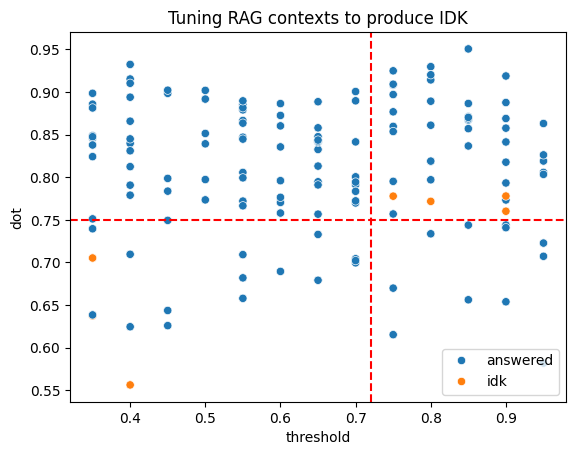

In [182]:
ax = sns.scatterplot(data=concat_final,x='threshold',y='dot',hue='idk')
plt.legend(loc='lower right')
ax.set_title("Tuning RAG contexts to produce IDK")
ax.axhline(0.75, ls='--',color='r')
ax.axvline(0.72, ls='--',color='r')